In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv(r"C:\Users\abcde\Downloads\Energy_consumption.csv")
df.head(2)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855


In [63]:
df['HVACUsage'] = df['HVACUsage'].map({'On':1 , 'Off':0})

In [64]:
df['LightingUsage'] = df['LightingUsage'].map({'On':1 , 'Off':0})

In [65]:
df['Holiday'] = df['Holiday'].map({'Yes':1 , 'No':0})

In [66]:
df['DayOfWeek'] = df['DayOfWeek'].map({'Sunday':0 , 'Monday':1 , 'Tuesday':2 , 'Wednesday':3 , 'Thursday':4 , 'Friday':5 , 'Saturday':6 })

In [67]:
print(df['DayOfWeek'].unique())

[1 6 0 3 5 4 2]


In [44]:
df.head(2)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,0,0,83.401855


In [29]:
df.isnull().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

In [30]:
df.duplicated().sum()

np.int64(0)

In [69]:
df.describe()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,0.492000,0.491000,15.132813,3.049000,0.467000,77.055873
std,2.836850,8.518905,288.418873,2.865598,0.500186,0.500169,8.745917,2.028476,0.499159,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.000000,0.000000,0.006642,0.000000,0.000000,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,0.000000,0.000000,7.628385,1.000000,0.000000,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,0.000000,0.000000,15.072296,3.000000,0.000000,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,1.000000,1.000000,22.884064,5.000000,1.000000,82.921742
max,29.998671,59.969085,1999.982252,9.000000,1.000000,1.000000,29.965327,6.000000,1.000000,99.201120


Text(0, 0.5, 'EnergyConsumption')

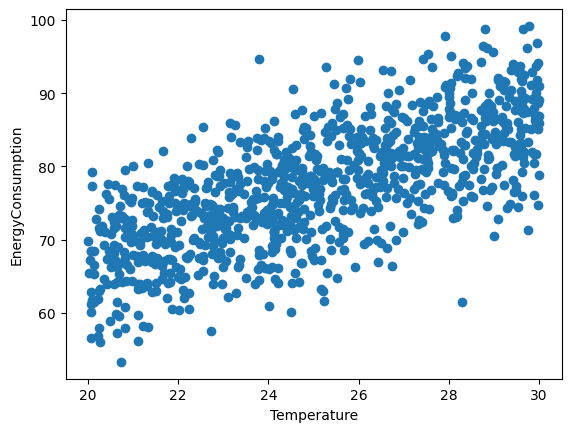

In [32]:
plt.scatter(x=df['Temperature'], y= df['EnergyConsumption'])
plt.xlabel('Temperature')
plt.ylabel('EnergyConsumption')

Text(0, 0.5, 'EnergyConsumption')

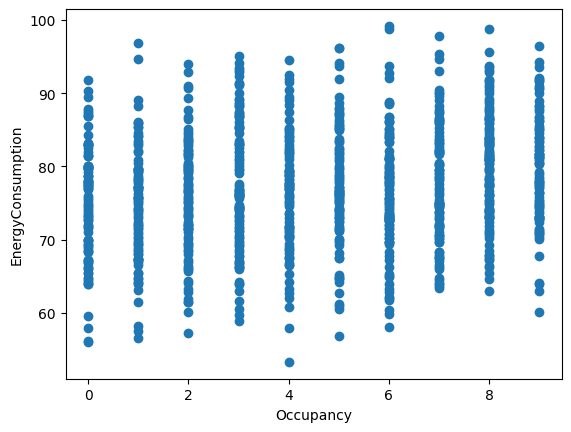

In [33]:
plt.scatter(x=df['Occupancy'], y= df['EnergyConsumption'])
plt.xlabel('Occupancy')
plt.ylabel('EnergyConsumption')

<Axes: xlabel='EnergyConsumption'>

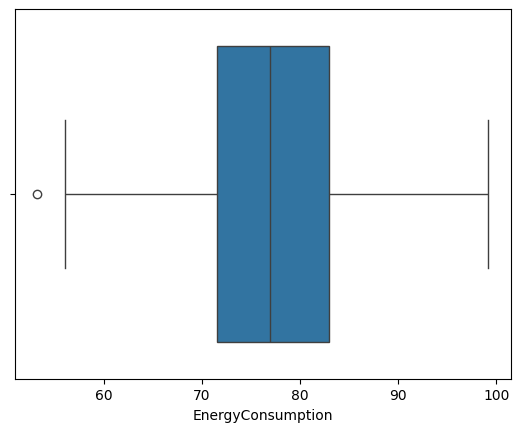

In [102]:
import seaborn as sns
sns.boxplot(x = df['EnergyConsumption'])

<Axes: xlabel='SquareFootage'>

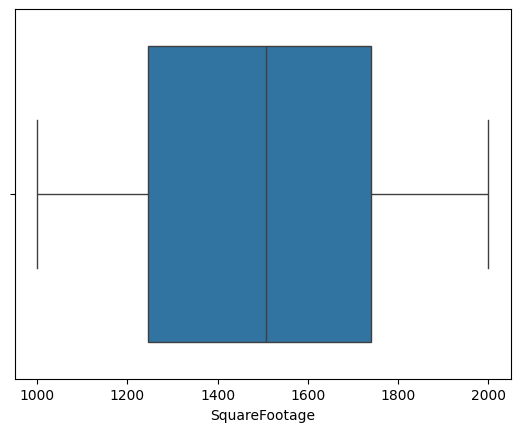

In [122]:
import seaborn as sns
sns.boxplot(x = df['SquareFootage'])

In [119]:
Q1_energy = df['EnergyConsumption'].quantile(0.25)  # First quartile
Q3_energy = df['EnergyConsumption'].quantile(0.75)  # Third quartile
IQR_energy = Q3_energy - Q1_energy  # Interquartile range

# Define lower and upper bounds
lower_bound_energy = Q1_energy - 1.5 * IQR_energy
upper_bound_energy = Q3_energy + 1.5 * IQR_energy
df = df[(df['EnergyConsumption'] >= lower_bound_energy) & (df['EnergyConsumption'] <= upper_bound_energy)]

<Axes: xlabel='Temperature'>

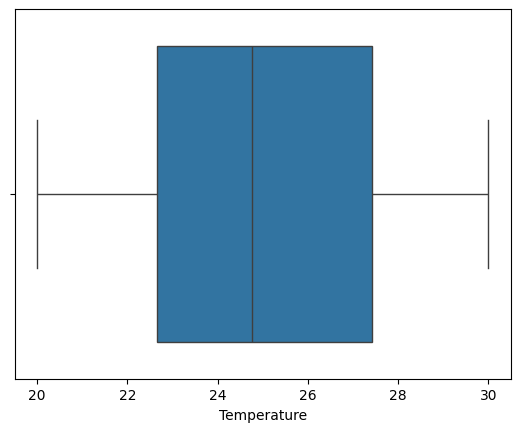

In [120]:
import seaborn as sns
sns.boxplot(x = df['Temperature'])

<Axes: xlabel='Humidity'>

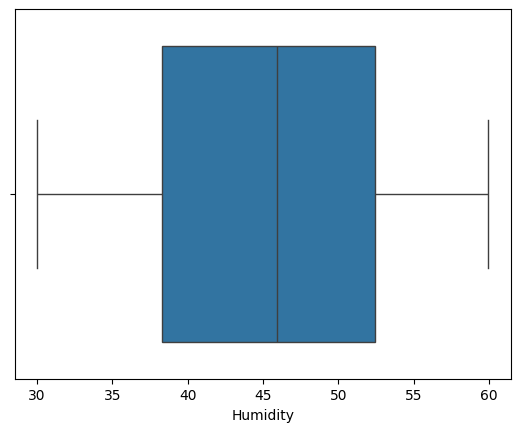

In [121]:
import seaborn as sns
sns.boxplot(x = df['Humidity'])

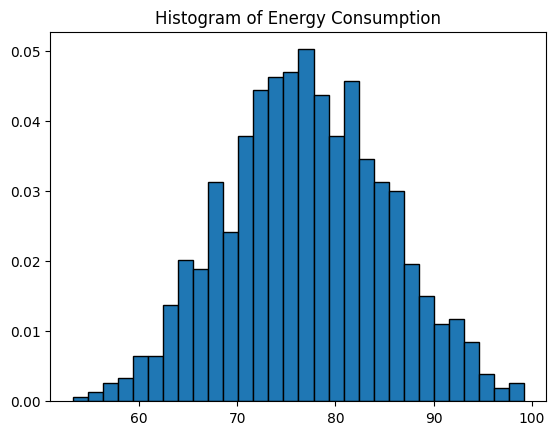

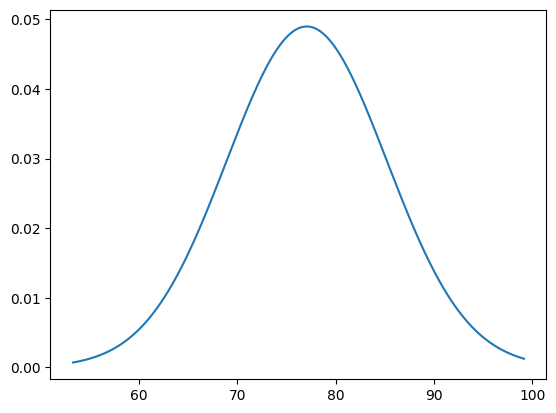

In [111]:
from scipy.stats import norm
plt.hist(df['EnergyConsumption'], bins=30, edgecolor='k', density=True)
plt.title("Histogram of Energy Consumption")
plt.show()
rng = np.arange(df.EnergyConsumption.min(), df.EnergyConsumption.max(), 0.1) 
plt.plot(rng, norm.pdf(rng, df.EnergyConsumption.mean(), df.EnergyConsumption.std()))

In [123]:
df.drop(columns = ['Timestamp']).corr()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Temperature,1.000000,-0.033524,0.006312,-0.003799,-0.000239,0.010990,-0.002354,0.002444,0.025530,0.695788
Humidity,-0.033524,1.000000,-0.015089,0.004841,-0.093709,-0.022592,0.002297,-0.003666,-0.033407,-0.092918
SquareFootage,0.006312,-0.015089,1.000000,0.009940,0.019416,-0.018127,0.022997,0.004650,-0.026887,0.002298
Occupancy,-0.003799,0.004841,0.009940,1.000000,0.012481,-0.011862,0.013547,0.004422,0.029687,0.186791
HVACUsage,-0.000239,-0.093709,0.019416,0.012481,1.000000,-0.049349,0.015572,0.008742,0.032128,0.284944
LightingUsage,0.010990,-0.022592,-0.018127,-0.011862,-0.049349,1.000000,-0.028635,0.000935,0.043909,0.096868
RenewableEnergy,-0.002354,0.002297,0.022997,0.013547,0.015572,-0.028635,1.000000,-0.006061,-0.036541,0.079565
DayOfWeek,0.002444,-0.003666,0.004650,0.004422,0.008742,0.000935,-0.006061,1.000000,-0.022730,0.018914
Holiday,0.025530,-0.033407,-0.026887,0.029687,0.032128,0.043909,-0.036541,-0.022730,1.000000,0.054193
EnergyConsumption,0.695788,-0.092918,0.002298,0.186791,0.284944,0.096868,0.079565,0.018914,0.054193,1.000000


In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = df['EnergyConsumption']
X = scaler.fit_transform(df[['Temperature', 'Occupancy', 'HVACUsage']])

In [125]:
X

array([[0.51364368, 0.55555556, 1.        ],
       [0.77309615, 0.11111111, 1.        ],
       [0.87044537, 0.22222222, 0.        ],
       ...,
       [0.30004438, 0.66666667, 0.        ],
       [0.51353673, 0.33333333, 1.        ],
       [0.30463092, 0.66666667, 0.        ]])

In [126]:
X = pd.DataFrame(data=X, columns=['Temperature', 'Occupancy', 'HVACUsage'])

In [127]:
X.head(2)

,Temperature,Occupancy,HVACUsage
0,0.513644,0.555556,1.0
1,0.773096,0.111111,1.0


In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

In [129]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBRegressor

In [130]:
model_params = {
    'grad_boost': {
        'model' : GradientBoostingRegressor(random_state=0),
        'params' : {
            'n_estimators' : [50,80,100,120],
            'learning_rate' : [0.01, 0.1, 0.5],
            'max_depth' : [3,4,5],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5],
            'subsample': [0.6, 0.8, 1.0]
        }
    },
    'svm': {
        'model' : SVR(gamma='auto'),
        'params' : {
            'C':[0.1,1,10,20, 25, 30],
            'kernel':['rbf','linear'],
            'epsilon': [0.01, 0.1, 1.0],
            'gamma': [0.001, 0.01, 0.1, 1.0, 'scale']
        }
    },
    'random_forest' : {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [1,5,10,50],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5],
            'max_features': ['sqrt', 'log2', None]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': np.logspace(-4, 2, 50)  # Example parameter grid for Ridge
        }
    },
    'linear_regression' : {
        'model': LinearRegression(), 
        'params': {
        }
    },
    'xgboost': {
        'model': XGBRegressor(random_state=0),
        'params': {
            'n_estimators': [50, 100, 150, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'reg_alpha': [0, 0.1, 1],
            'reg_lambda': [1, 1.5, 2]
        }
    }
}

In [131]:
scores_3 = []
for model_name, mp in model_params.items():   # model_name is the key in dictionary and mp are the values which itself is 
    #dictionary containg model and params as values... .items() alows us to access both keys and values simultaneously in dictionary 
    clf = RandomizedSearchCV(mp['model'], mp['params'], cv=5)
    clf.fit(X_train, y_train)
    scores_3.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    }) 

C:\Users\abcde\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [133]:
scor_d_3 = pd.DataFrame(scores_3, columns = ['model', 'best_score', 'best_params'])                             
scor_d_3

,model,best_score,best_params
0,grad_boost,0.553561,"{'subsample': 0.6, 'n_estimators': 120, 'min_s..."
1,svm,0.594681,"{'kernel': 'linear', 'gamma': 'scale', 'epsilo..."
2,random_forest,0.569204,"{'n_estimators': 50, 'min_samples_split': 5, '..."
3,Ridge,0.595666,{'alpha': 0.0655128556859551}
4,linear_regression,0.595650,{}
5,xgboost,0.581051,"{'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha..."


In [136]:
best_model_3 = clf.best_estimator_
best_model_3

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [135]:
y_pred_random_3 = best_model_random_3.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse_random_3 = mean_squared_error(y_test, y_pred_random_3)
r2_random_3 = r2_score(y_test, y_pred_random_3)

print("Mean Squared Error (MSE):", mse_random_3)
print("R² Score:", r2_random_3)

Mean Squared Error (MSE): 26.569846909947852
R² Score: 0.5941957153871147


In [138]:
from sklearn.model_selection import cross_val_score
cross_val_score(Ridge(0.0655), X_train, y_train)

array([0.63762459, 0.62434056, 0.56428825, 0.56336404, 0.58871495])

In [139]:
X_all = scaler.fit_transform(df.drop(columns = ['EnergyConsumption', 'Timestamp']))
X_all = pd.DataFrame(data=X_all, columns=df.drop(columns = ['EnergyConsumption','Timestamp']).columns)

In [140]:
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state = 40)

In [141]:
scores_all = []
for model_name, mp in model_params.items():   # model_name is the key in dictionary and mp are the values which itself is 
    #dictionary containg model and params as values... .items() alows us to access both keys and values simultaneously in dictionary 
    clf = RandomizedSearchCV(mp['model'], mp['params'], cv=5)
    clf.fit(X_train_all, y_train_all)
    scores_all.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    }) 

C:\Users\abcde\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [142]:
scor_d_all = pd.DataFrame(scores_all, columns = ['model', 'best_score', 'best_params'])                             
scor_d_all

,model,best_score,best_params
0,grad_boost,0.558439,"{'subsample': 1.0, 'n_estimators': 50, 'min_sa..."
1,svm,0.600348,"{'kernel': 'linear', 'gamma': 0.1, 'epsilon': ..."
2,random_forest,0.570786,"{'n_estimators': 50, 'min_samples_split': 10, ..."
3,Ridge,0.605648,{'alpha': 0.47148663634573945}
4,linear_regression,0.605571,{}
5,xgboost,0.571954,"{'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha..."


In [143]:
best_model_all = clf.best_estimator_

In [144]:
y_pred_all = best_model_all.predict(X_test_all)

In [145]:
from sklearn.metrics import mean_squared_error, r2_score
mse_all = mean_squared_error(y_test_all, y_pred_all)
r2_all = r2_score(y_test_all, y_pred_all)

print("Mean Squared Error (MSE):", mse_all)
print("R² Score:", r2_all)

Mean Squared Error (MSE): 29.425145155978353
R² Score: 0.5505864215129745


In [146]:
from sklearn.model_selection import cross_val_score
cross_val_score(Ridge(0.47), X_train_all, y_train_all)

array([0.65289306, 0.65017216, 0.57295329, 0.57239521, 0.57982515])

In [150]:
X_7 = scaler.fit_transform(df.drop(columns = ['EnergyConsumption', 'Timestamp', 'SquareFootage', 'DayOfWeek']))
X_7 = pd.DataFrame(data=X_7, columns=df.drop(columns = ['EnergyConsumption','Timestamp', 'SquareFootage', 'DayOfWeek']).columns)

In [151]:
from sklearn.model_selection import train_test_split
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_7, y, test_size=0.2, random_state = 40)

In [152]:
scores_7 = []
for model_name, mp in model_params.items():   # model_name is the key in dictionary and mp are the values which itself is 
    #dictionary containg model and params as values... .items() alows us to access both keys and values simultaneously in dictionary 
    clf = RandomizedSearchCV(mp['model'], mp['params'], cv=5)
    clf.fit(X_train_7, y_train_7)
    scores_7.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    }) 

C:\Users\abcde\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [153]:
scor_d_7 = pd.DataFrame(scores_7, columns = ['model', 'best_score', 'best_params'])                             
scor_d_7

,model,best_score,best_params
0,grad_boost,0.580991,"{'subsample': 0.8, 'n_estimators': 80, 'min_sa..."
1,svm,0.603696,"{'kernel': 'linear', 'gamma': 0.1, 'epsilon': ..."
2,random_forest,0.555791,"{'n_estimators': 50, 'min_samples_split': 10, ..."
3,Ridge,0.606835,{'alpha': 0.35564803062231287}
4,linear_regression,0.606792,{}
5,xgboost,0.574697,"{'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha..."


In [154]:
best_model_7 = clf.best_estimator_
y_pred_7 = best_model_7.predict(X_test_7)

In [155]:
from sklearn.metrics import mean_squared_error, r2_score
mse_7 = mean_squared_error(y_test_7, y_pred_7)
r2_7 = r2_score(y_test_7, y_pred_7)

print("Mean Squared Error (MSE):", mse_7)
print("R² Score:", r2_7)

Mean Squared Error (MSE): 30.10771055867879
R² Score: 0.5401615227213803


In [156]:
cross_val_score(Ridge(0.35), X_train_7, y_train_7)

array([0.65101574, 0.64865414, 0.58213878, 0.57214756, 0.58021569])